In [1]:
import numpy as np
import matplotlib.pyplot as plt

## a) Generadores de números al azar con distribución uniforme, provistos por el lenguaje elegido para resolver el tp

In [2]:
MAX_POINT = 40

In [3]:
p1 = [20 - np.sqrt(50), 20]
p2 = [20, 20 - np.sqrt(50)]
p3 = [20 + np.sqrt(50), 20]
p4 = [20, 20 + np.sqrt(50)]

In [4]:
def get_coefficients(point1, point2):
    """Calculo los coeficientes de la recta"""
    a = (point2[1] - point1[1]) / (point2[0] - point1[0])
    b = point1[1] - a * point1[0]    
    return a, b

In [5]:
def plot_lines():
    def plot_line(point1, point2, n_points=100):
        a, b = get_coefficients(point1, point2)
        polynomial = lambda x: a * x + b
        x_axis = np.linspace(0, MAX_POINT, n_points)
        y_axis = polynomial(x_axis)
        plt.plot(x_axis, y_axis)
    
    plot_line(p1, p4)
    plot_line(p2, p3)
    plot_line(p1, p2)
    plot_line(p4, p3)

In [6]:
def plot_points(n_points=10000):
    def corte1(x, y):
        a, b = get_coefficients(p1, p4)
        return y < a*x + b
    
    def corte2(x, y):
        a, b = get_coefficients(p2, p3)
        return y > a*x + b
    
    def corte3(x, y):
        a, b = get_coefficients(p1, p2)
        return y > a*x + b
    
    def corte4(x, y):
        a, b = get_coefficients(p4, p3)
        return y < a*x + b
    
    x = [x*MAX_POINT for x in np.random.rand(n_points)]
    y = [y*MAX_POINT for y in np.random.rand(n_points)]
    X = []
    Y = []
    for i in range(n_points):
        if corte1(x[i], y[i]) & corte2(x[i], y[i]) & corte3(x[i], y[i]) & corte4(x[i], y[i]):
            X.append(x[i])
            Y.append(y[i])
    plt.scatter(X, Y)

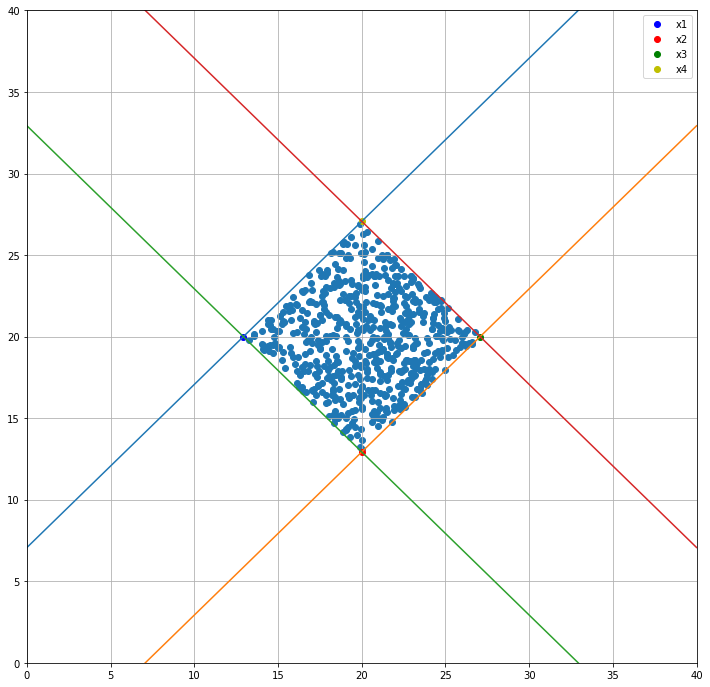

In [7]:
plt.figure(figsize=(12, 12))
plt.plot( p1[0], p1[1], 'go', label='x1', color='b')
plt.plot( p2[0], p2[1], 'go', label='x2', color='r')
plt.plot( p3[0], p3[1], 'go', label='x3', color='g')
plt.plot( p4[0], p4[1], 'go', label='x4', color='y')
plot_lines()
plot_points()
plt.ylim( (0, MAX_POINT) ) 
plt.xlim( (0, MAX_POINT) )
plt.grid('on')
plt.legend()
plt.show()